In [53]:
 %pprint

Pretty printing has been turned OFF


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
mino_3 = {0:"A",
         1:"B",
         2:"C",
         3:"D",
         4:"E",
         5:"F"}


transitions = np.array([[5/9, 0, 1/9, 1/9, 1/9, 1/9], 
              [0, 5/9, 1/9, 1/9, 1/9, 1/9],
              [1/9, 1/9, 7/18, 1/9, 1/9, 1/6],
              [1/9, 1/9, 1/9, 7/18, 1/6, 1/9],
              [1/9, 1/9, 1/9, 1/6, 7/18, 1/9],
              [1/9, 1/9, 1/6, 1/9, 1/9, 7/18]])

In [79]:
n = 15
start_mino = 0
print(mino_3[start_mino], "->", end =" ")
prev_mino = start_mino

while n-1:
    curr_mino = np.random.choice([0, 1, 2, 3, 4, 5], p=transitions[prev_mino])
    print(mino_3[curr_mino], "->", end =" ")
    n -= 1
    
print("end")

A -> A -> C -> A -> A -> A -> E -> F -> C -> A -> A -> A -> E -> E -> A -> end


In [80]:
steps = 1000
start_mino = 0
prob = np.array([0, 0, 0, 0, 0, 0])
prob[start_mino] = 1
prev_mino = start_mino


i = 0
while i < steps:
    curr_mino = np.random.choice([0, 1, 2, 3, 4, 5], p=transitions[prev_mino])
    prob[curr_mino] += 1
    prev_mino = curr_mino
    i += 1
    
print("Prob = ", prob/steps)

Prob =  [0.168 0.174 0.149 0.168 0.173 0.169]


In [81]:
steps = 10000
transitions_n = transitions

i = 0

while i < steps:
    transitions_n = np.matmul(transitions_n, transitions)
    i += 1
    
print("Prob = ", transitions_n[0])

Prob =  [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [67]:
def end_mino(start, steps):
    
    n = steps
    start_mino = start
    prev_mino = start_mino

    while n-1:
        curr_mino = np.random.choice([0, 1, 2, 3, 4, 5], p=transitions[prev_mino])
        prev_mino = curr_mino
        n -= 1
    
    return mino_3[curr_mino]

In [68]:
def mino_sim(start, steps, sims):
    list_mino = []
    for i in range(1, sims):
        list_mino.append(end_mino(start, steps))
        
    return list_mino

In [70]:
mino_3_list = ["A", "B", "C", "D", "E", "F"]
mino_count = [0] * len(mino_3_list)

<AxesSubplot:>

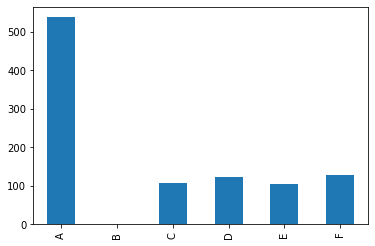

In [71]:
hist_1 = mino_sim(0, 2, 1000)
hist_1_dict = dict(zip(mino_3_list, mino_count))
hist_1_dict.update(Counter(hist_1))

hist_1_df = pd.DataFrame.from_dict(hist_1_dict, orient = "index")
hist_1_df.plot(kind = "bar", legend = False)

<AxesSubplot:>

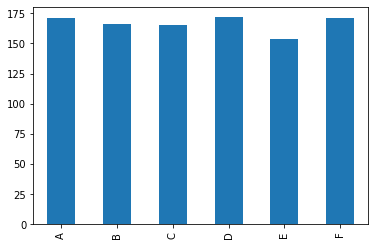

In [72]:
hist_10 = mino_sim(0, 11, 1000)
hist_10_dict = dict(zip(mino_3_list, mino_count))
hist_10_dict.update(Counter(hist_10))

hist_10_df = pd.DataFrame.from_dict(hist_10_dict, orient = "index")
hist_10_df.plot(kind = "bar", legend = False)

<AxesSubplot:>

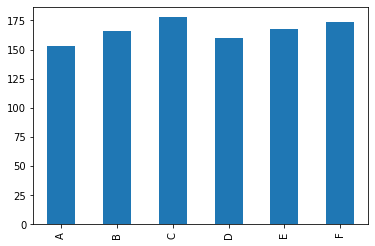

In [73]:
hist_100 = mino_sim(0, 101, 1000)
hist_100_dict = dict(zip(mino_3_list, mino_count))
hist_100_dict.update(Counter(hist_100))

hist_100_df = pd.DataFrame.from_dict(hist_100_dict, orient = "index")
hist_100_df.plot(kind = "bar", legend = False)

<AxesSubplot:>

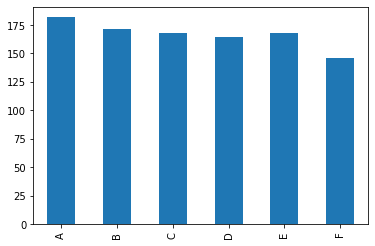

In [74]:
hist_1000 = mino_sim(0, 1001, 1000)
hist_1000_dict = dict(zip(mino_3_list, mino_count))
hist_1000_dict.update(Counter(hist_1000))

hist_1000_df = pd.DataFrame.from_dict(hist_1000_dict, orient = "index")
hist_1000_df.plot(kind = "bar", legend = False)

<AxesSubplot:>

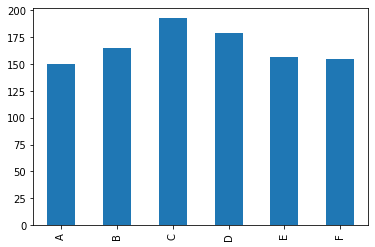

In [76]:
hist_10000 = mino_sim(0, 10001, 1000)
hist_10000_dict = dict(zip(mino_3_list, mino_count))
hist_10000_dict.update(Counter(hist_10000))

hist_10000_df = pd.DataFrame.from_dict(hist_10000_dict, orient = "index")
hist_10000_df.plot(kind = "bar", legend = False)